# Customer Churn Prediction Using Machine Learning | Project Machine Learning

## 1. Problem Statement

A marketing agency has many customers that use their service to produce ads for the client/customer websites. They've noticed that they have quite a bit of churn in clients. They basically randomly assign account managers right now, but want you to create a machine learning model that will help predict which customers will churn (stop buying their service) so that they can correctly assign the customers most at risk to churn an account manager. Luckily they have some historical data, can you help them out? Create a classification algorithm that will help classify whether or not a customer churned. Then the company can test this against incoming data for future customers to predict which customers will churn and assign them an account manager.

## 2. About Dataset

- Name : Name of the latest contact at Company
- Age: Customer Age
- Total_Purchase: Total Ads Purchased
- Account_Manager: Binary 0=No manager, 1= Account manager assigned
- Years: Totaly Years as a customer
- Num_sites: Number of websites that use the service.
- Onboard_date: Date that the name of the latest contact was onboarded
- Location: Client HQ Address
- Company: Name of Client Company

## 3. Libraries

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

## 4. Load and Explore Dataset

In [40]:
data = pd.read_csv("customer_churn.csv")

In [41]:
# show the first 5 rows data
data.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [42]:
# show the last 5 rows data
data.tail()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
895,Paul Miller,42.0,12800.82,1,3.62,8.0,2007-12-01 13:29:34,"9316 Julian Fort Suite 328 North Leslie, ME 43961",Evans-Lucero,0
896,Natalie Hodges,52.0,9893.92,0,6.91,7.0,2008-12-28 15:23:58,"8419 William Square Apt. 695 Martinville, RI 3...",Perry and Sons,0
897,Ana Smith,45.0,12056.18,0,5.46,4.0,2014-06-20 05:10:09,Unit 8633 Box 8738 DPO AA 14126-5026,Schneider-Smith,0
898,Justin Leonard,51.0,6517.93,1,5.47,10.0,2012-05-30 00:15:43,"49800 Torres Ways Suite 886 West Bradleybury, ...",Robles-Abbott,0
899,Joseph Williams,39.0,9315.60,1,5.02,10.0,2010-09-25 12:16:08,"27252 Olivia Burgs Rivasmouth, MN 80121-6348",Davis Group,0


In [43]:
# dimention of dataset
print("Number of Rows is", data.shape[0])
print("Number of Feature is", data.shape[1])

Number of Rows is 900
Number of Feature is 10


In [44]:
# list of column dataset
column = data.columns.tolist()
column

['Names',
 'Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites',
 'Onboard_date',
 'Location',
 'Company',
 'Churn']

In [45]:
# information data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


In [46]:
# descriptive statistics

data.describe(include='all')

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
count,900,900.000000,900.000000,900.000000,900.000000,900.000000,900,900,900,900.000000
unique,899,NaN,NaN,NaN,NaN,NaN,900,900,873,NaN
top,Jennifer Wood,NaN,NaN,NaN,NaN,NaN,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Anderson Group,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,1,1,4,NaN
mean,NaN,41.816667,10062.824033,0.481111,5.273156,8.587778,NaN,NaN,NaN,0.166667
std,NaN,6.127560,2408.644532,0.499921,1.274449,1.764836,NaN,NaN,NaN,0.372885
min,NaN,22.000000,100.000000,0.000000,1.000000,3.000000,NaN,NaN,NaN,0.000000
25%,NaN,38.000000,8497.122500,0.000000,4.450000,7.000000,NaN,NaN,NaN,0.000000
50%,NaN,42.000000,10045.870000,0.000000,5.215000,8.000000,NaN,NaN,NaN,0.000000
75%,NaN,46.000000,11760.105000,1.000000,6.110000,10.000000,NaN,NaN,NaN,0.000000


## 5. Check Missing Values

In [47]:
data.isna().sum().any()

False

## 6. Check Duplicated Value

In [48]:
data.duplicated().sum().any()

False

## 7. Drop Irrelevant Feature

In [49]:
df = data.drop(columns=['Names','Onboard_date','Location','Company'])
df

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,42.0,11066.80,0,7.22,8.0,1
1,41.0,11916.22,0,6.50,11.0,1
2,38.0,12884.75,0,6.67,12.0,1
3,42.0,8010.76,0,6.71,10.0,1
4,37.0,9191.58,0,5.56,9.0,1
...,...,...,...,...,...,...
895,42.0,12800.82,1,3.62,8.0,0
896,52.0,9893.92,0,6.91,7.0,0
897,45.0,12056.18,0,5.46,4.0,0
898,51.0,6517.93,1,5.47,10.0,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              900 non-null    float64
 1   Total_Purchase   900 non-null    float64
 2   Account_Manager  900 non-null    int64  
 3   Years            900 non-null    float64
 4   Num_Sites        900 non-null    float64
 5   Churn            900 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 42.3 KB


## 8. Split Column Types

In [51]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
categorical_features = [feature for feature in df.columns if feature not in numerical_features]

## 9. Exploratory Data Analysis

#### a. Discrete Numerical Features

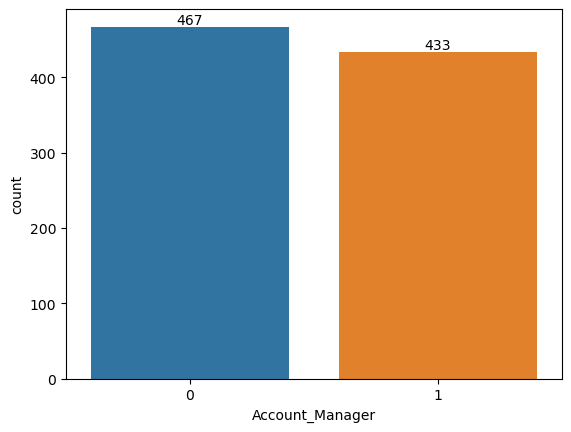

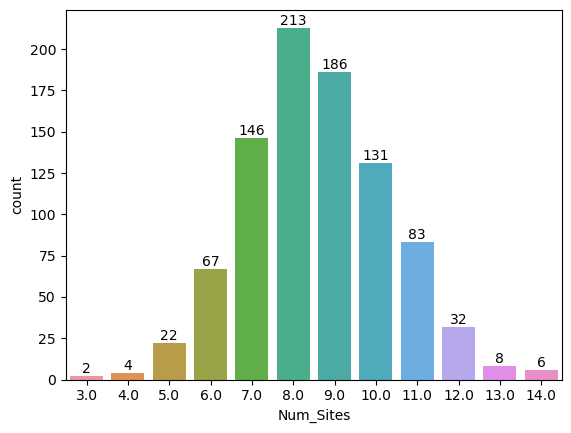

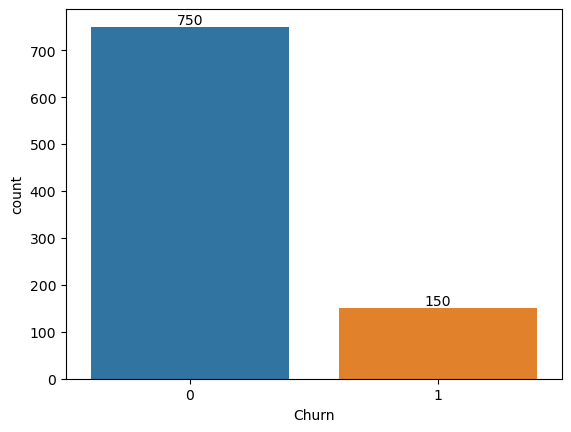

In [52]:
for col in discrete_features:
    ax = sns.countplot(data=data, x=col)
    ax.bar_label(ax.containers[0], fmt='{:0,.0f}', fontsize=10)
    plt.show()

we can see that the target Churn have imbalanced data

#### b. Continuous Numerical Features

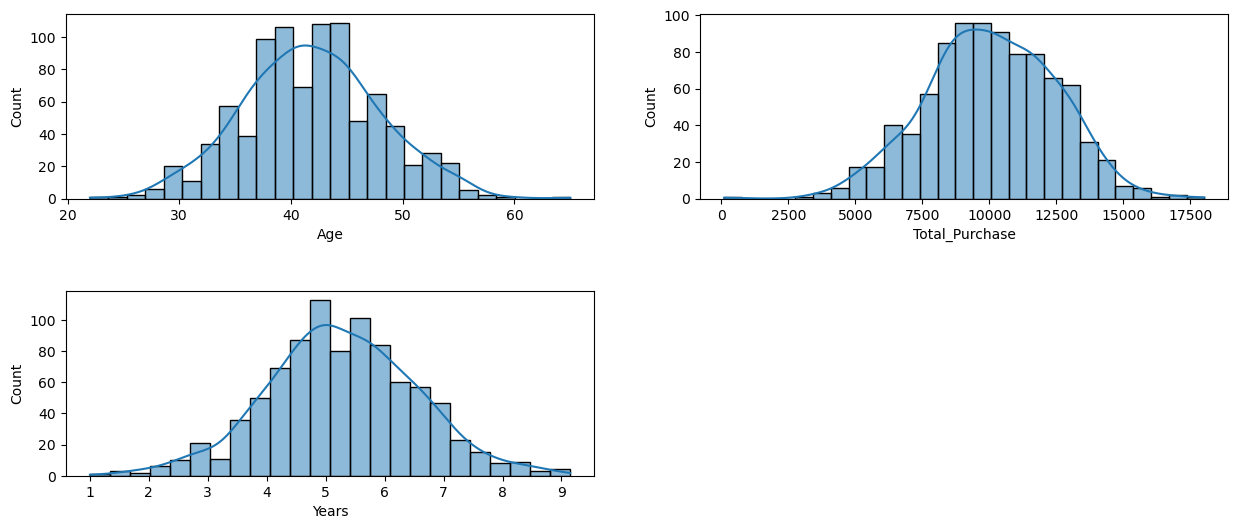

In [53]:
# Histogram
plt.figure(figsize=(15,6))

for i,j in enumerate(continuous_features,1):
    plt.subplot(2,2,i)
    sns.histplot(data=data, x=j, kde=True)
    plt.subplots_adjust(hspace=0.5)
plt.show()

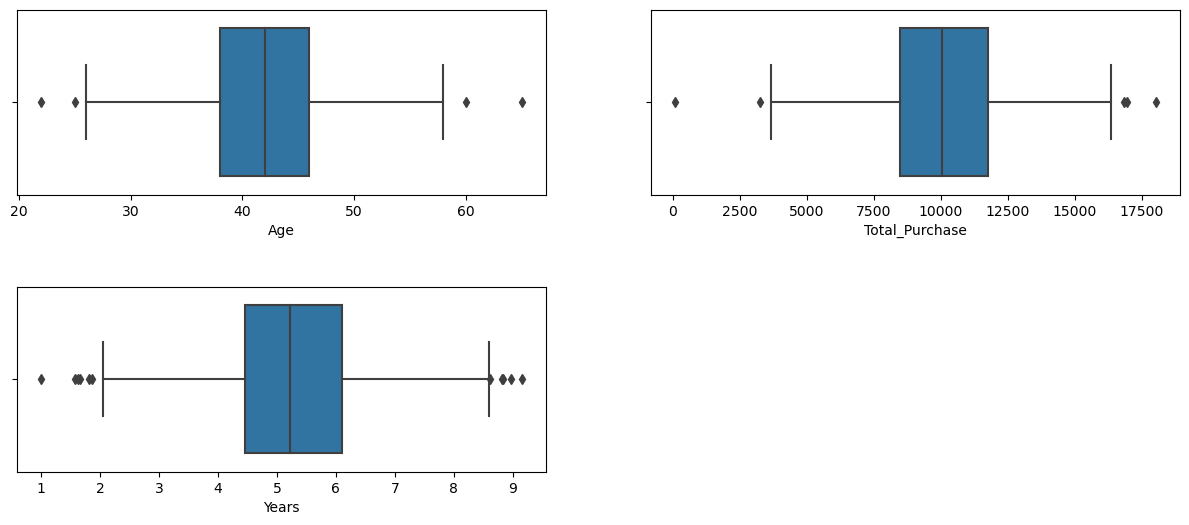

In [54]:
# Boxplot
plt.figure(figsize=(15,6))

for i,j in enumerate(continuous_features,1):
    plt.subplot(2,2,i)
    sns.boxplot(data=data, x=j)
    plt.subplots_adjust(hspace=0.5)
plt.show()

we can se that we have outliers in all feature in continuous features.

## 10. Check Outliers

In [55]:
df

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,42.0,11066.80,0,7.22,8.0,1
1,41.0,11916.22,0,6.50,11.0,1
2,38.0,12884.75,0,6.67,12.0,1
3,42.0,8010.76,0,6.71,10.0,1
4,37.0,9191.58,0,5.56,9.0,1
...,...,...,...,...,...,...
895,42.0,12800.82,1,3.62,8.0,0
896,52.0,9893.92,0,6.91,7.0,0
897,45.0,12056.18,0,5.46,4.0,0
898,51.0,6517.93,1,5.47,10.0,0


In [56]:
data

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1
...,...,...,...,...,...,...,...,...,...,...
895,Paul Miller,42.0,12800.82,1,3.62,8.0,2007-12-01 13:29:34,"9316 Julian Fort Suite 328 North Leslie, ME 43961",Evans-Lucero,0
896,Natalie Hodges,52.0,9893.92,0,6.91,7.0,2008-12-28 15:23:58,"8419 William Square Apt. 695 Martinville, RI 3...",Perry and Sons,0
897,Ana Smith,45.0,12056.18,0,5.46,4.0,2014-06-20 05:10:09,Unit 8633 Box 8738 DPO AA 14126-5026,Schneider-Smith,0
898,Justin Leonard,51.0,6517.93,1,5.47,10.0,2012-05-30 00:15:43,"49800 Torres Ways Suite 886 West Bradleybury, ...",Robles-Abbott,0


#### a. Number of Outliers

In [57]:
for feature in continuous_features:
    Q1 = np.percentile(df[feature], 25)
    Q3 = np.percentile(df[feature], 75)
    IQR = Q3 - Q1
    outlier_step = 1.5 * IQR
    lower_limit = Q1 - outlier_step
    upper_limit = Q3 + outlier_step
    number_outliers = len(df[(df[feature]<lower_limit) | (df[feature]>upper_limit)])
    print('Number of Outliers for', feature, ":", number_outliers)

Number of Outliers for Age : 4
Number of Outliers for Total_Purchase : 5
Number of Outliers for Years : 11


#### b. Remove Outliers

In [58]:
def outliers(data_out):
    for each_feature in data_out.columns:
        feature_data = data_out[each_feature]
        Q1 = np.percentile(feature_data, 25.)
        Q3 = np.percentile(feature_data, 75.)
        IQR = Q3-Q1
        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
#         if not drop:
#             print('For the feature {}, Num of Outliers is {}'.format(each_feature, len(outliers)))
#         if drop:
#             df.drop(outliers, inplace = True, errors = 'ignore')
#             print('Outliers from {} feature removed'.format(each_feature))
    return outliers

In [63]:
a=data.loc[outliers(df[continuous_features]),]

In [65]:
len(a)

11

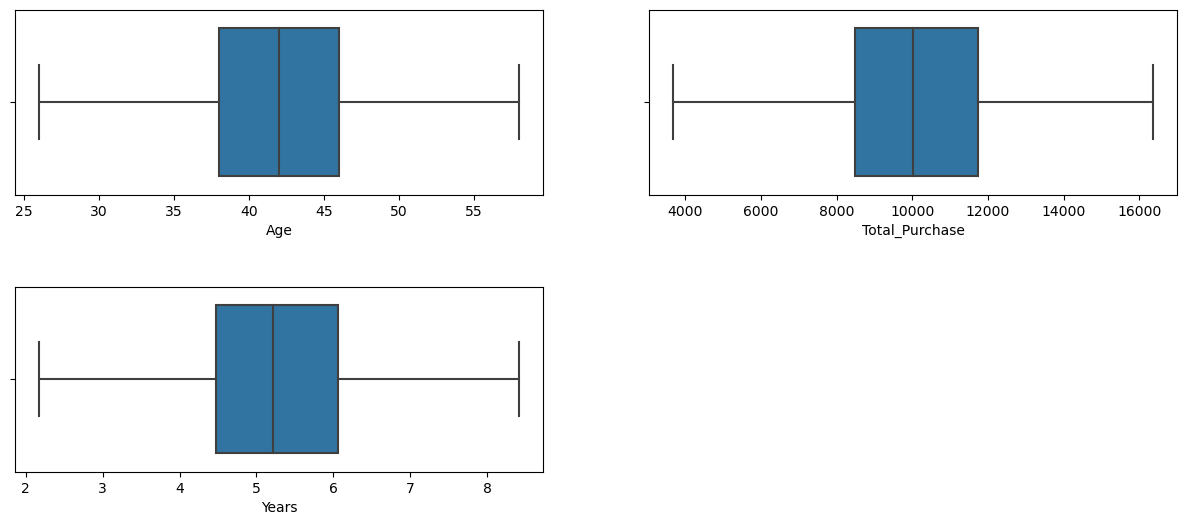

In [30]:
plt.figure(figsize=(15,6))

for i,j in enumerate(continuous_features,1):
    plt.subplot(2,2,i)
    sns.boxplot(data=df, x=j)
    plt.subplots_adjust(hspace=0.5)
plt.show()

## 11. Handling Imbalanced Data with SMOTE Undersampling

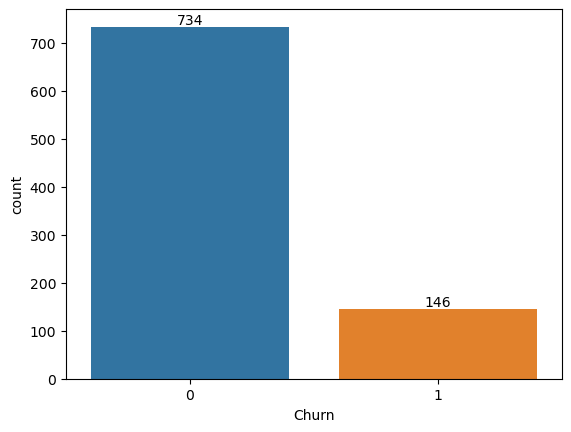

In [113]:
ax = sns.countplot(data=df, x='Churn')
ax.bar_label(ax.containers[0], fmt='{:0,.0f}', fontsize=10)
plt.show()

In [114]:
data_churn_1 = df[df['Churn']==1]
data_churn_0 = df[df['Churn']==0]

In [115]:
data_churn_0_new = data_churn_0.sample(len(data_churn_1))

In [116]:
data = pd.concat([data_churn_1, data_churn_0_new], axis=0)

In [117]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)
data

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,51.0,8100.43,1,4.92,13.0,1
1,42.0,10583.76,0,6.51,9.0,0
2,40.0,11185.62,0,6.26,12.0,1
3,52.0,10133.36,0,4.60,7.0,0
4,58.0,9703.93,0,5.16,11.0,1
...,...,...,...,...,...,...
287,42.0,8558.52,0,5.36,7.0,0
288,37.0,11145.95,1,5.87,11.0,1
289,49.0,12112.53,0,7.31,9.0,1
290,37.0,10348.37,1,7.65,6.0,0


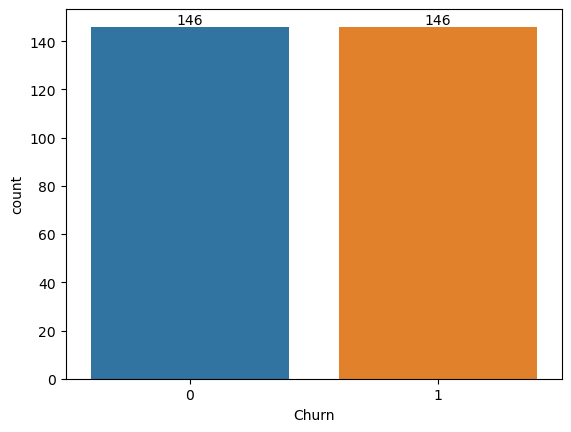

In [118]:
ax = sns.countplot(data=data, x='Churn')
ax.bar_label(ax.containers[0], fmt='{:0,.0f}', fontsize=10)
plt.show()

In [119]:
data

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,51.0,8100.43,1,4.92,13.0,1
1,42.0,10583.76,0,6.51,9.0,0
2,40.0,11185.62,0,6.26,12.0,1
3,52.0,10133.36,0,4.60,7.0,0
4,58.0,9703.93,0,5.16,11.0,1
...,...,...,...,...,...,...
287,42.0,8558.52,0,5.36,7.0,0
288,37.0,11145.95,1,5.87,11.0,1
289,49.0,12112.53,0,7.31,9.0,1
290,37.0,10348.37,1,7.65,6.0,0


Balance Dataset

## 12. Feature Engineering

In [120]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

def feature_engineering(data):
    le = LabelEncoder()
    scaler = StandardScaler()
    ohe = OneHotEncoder()

    X = data.drop(data.columns[-1], axis=1)
    y = data[data.columns[-1]]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    for col in X.columns:
        if X[col].dtypes == 'object':
            X_train[col] = le.fit_transform(X_train[col])
            X_test[col] = le.transform(X_test[col])
        else:
            X_train[col] = scaler.fit_transform(X_train[[col]])
            X_test[col] = scaler.transform(X_test[[col]])
    
    if y.dtype == 'object':
        y_train = le.fit_transform(y_train)
        y_test = le.transform(y_test)

    return X_train, X_test, y_train, y_test

In [121]:
X_train = feature_engineering(data)[0]
X_test = feature_engineering(data)[1]
y_train = feature_engineering(data)[2]
y_test = feature_engineering(data)[3]

In [122]:
y_test

84     1
260    0
45     1
176    0
143    1
      ..
137    1
111    0
208    0
152    0
18     0
Name: Churn, Length: 88, dtype: int64

## 13. Model Development

In [123]:
#Training Model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [124]:
# Prediction

y_predict = logreg.predict(X_test)
y_predict

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [125]:
# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = classification_report(y_test, y_predict)
print(clf)

              precision    recall  f1-score   support

           0       0.69      0.79      0.74        43
           1       0.77      0.67      0.71        45

    accuracy                           0.73        88
   macro avg       0.73      0.73      0.73        88
weighted avg       0.73      0.73      0.73        88



## 14. Build Multiple Model Classification

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [127]:
logreg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
svc = SVC(probability=True)
nb = GaussianNB()
xgb = XGBClassifier()

In [128]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

models  =[logreg, dt, rf, knn, svc, nb, xgb]

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []

for model in models:
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    precision = precision_score (y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict)
    roc_auc = roc_auc_score(y_test, y_predict)
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    roc_auc_list.append(roc_auc)

In [129]:
model_name = ['Logistic Regression', 'Decision Tree', 'Random Forest','K-Nearest Neighbors', 'Support Vector Machine', 'Gaussian NB', 'XGBoost']


dictionary = {'Model': model_name,
             'Accuracy': accuracy_list,
             'Precision': precision_list,
             'Recall': recall_list,
             'f1 Score': f1_list,
             'ROC AUC': roc_auc_list}

report_df = pd.DataFrame(dictionary)
report_df

,Model,Accuracy,Precision,Recall,f1 Score,ROC AUC
0,Logistic Regression,0.727273,0.769231,0.666667,0.714286,0.728682
1,Decision Tree,0.704545,0.731707,0.666667,0.697674,0.705426
2,Random Forest,0.704545,0.787879,0.577778,0.666667,0.707494
3,K-Nearest Neighbors,0.727273,0.769231,0.666667,0.714286,0.728682
4,Support Vector Machine,0.761364,0.833333,0.666667,0.740741,0.763566
5,Gaussian NB,0.727273,0.769231,0.666667,0.714286,0.728682
6,XGBoost,0.715909,0.794118,0.600000,0.683544,0.718605


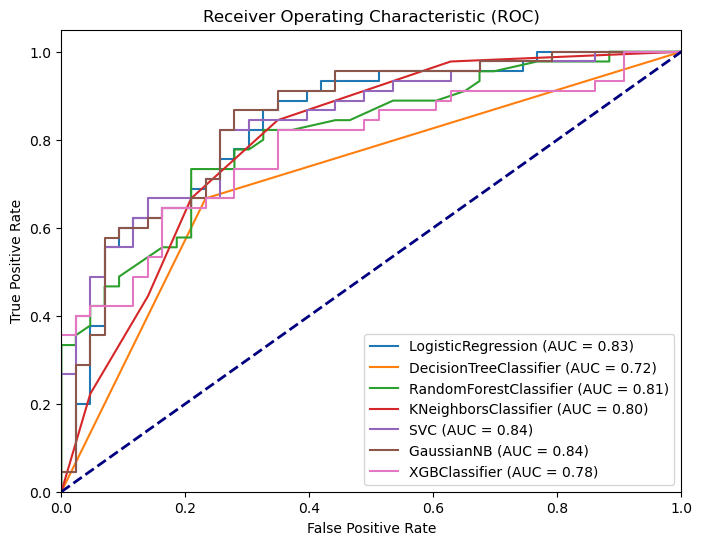

In [130]:
from sklearn.metrics import roc_curve, auc

models = [logreg, dt, rf, knn, svc, nb, xgb]

plt.figure(figsize=(8,6))

for model in models:
    model.fit(X_train, y_train)
    y_predict_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_predict_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## 15. Build Model Using Cross Validation

In [131]:
from sklearn.model_selection import cross_val_score

models = [logreg, dt, rf, knn, svc, nb, xgb]

acc_list = []
pre_list = []
recall_list = []
f1_list = []

feature = X_train
label = y_train
CV = 5

for model in models:
    accuries = cross_val_score(model, feature, label, scoring='accuracy', cv=CV)
    acc_list.append(accuries.mean())
for model in models:
    precisions = cross_val_score(model, feature, label, scoring='precision', cv=CV)
    pre_list.append(precisions.mean())
for model in models:
    recalls = cross_val_score(model, feature, label, scoring='recall', cv=CV)
    recall_list.append(recalls.mean())
for model in models:
    f1s = cross_val_score(model, feature, label, scoring='f1', cv=CV)
    f1_list.append(f1s.mean())

In [132]:
dictionary_cv = {'Model': model_name,
             'Accuracy': acc_list,
                'Precision': pre_list,
                'Recall': recall_list,
                'F1': f1_list}

report_df_cv = pd.DataFrame(dictionary_cv)
report_df_cv

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.823415,0.806536,0.851905,0.826788
1,Decision Tree,0.710732,0.727579,0.703810,0.725240
2,Random Forest,0.769878,0.792627,0.733333,0.770591
3,K-Nearest Neighbors,0.755000,0.753499,0.751905,0.751267
4,Support Vector Machine,0.784390,0.784721,0.781905,0.782336
5,Gaussian NB,0.813537,0.799869,0.841905,0.818295
6,XGBoost,0.799268,0.821938,0.762857,0.787124


The Best Model is Support Vector Machine

## 16. Hyperparameter Tunning

In [133]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter yang ingin diuji
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid_seacrh = GridSearchCV(estimator = svc, param_grid = param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_seacrh.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=1)

In [134]:
# Lihat hyperparameter terbaik
print("Best Parameters:", grid_seacrh.best_params_)
print("Best Score:", grid_seacrh.best_score_)

Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score: 0.838048780487805


## 17. Build New Model With Best Parameters

In [136]:
svm_model = SVC(C=10, gamma=0.01, kernel='rbf')
svm_model.fit(X_train, y_train)

SVC(C=10, gamma=0.01)

In [137]:
y_pred = svm_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [138]:
classification = classification_report(y_test, y_pred)
print("Final Report",classification)

Final Report               precision    recall  f1-score   support

           0       0.71      0.81      0.76        43
           1       0.79      0.69      0.74        45

    accuracy                           0.75        88
   macro avg       0.75      0.75      0.75        88
weighted avg       0.76      0.75      0.75        88



Copyright by ahmadalfianfaisal04@gmail.com